## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales-products.csv')
df.head() 

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,SaleID_1,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,SaleID_2,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
2,SaleID_3,United States,Fax,Outdoors Shop,NaN,Tents,Star Dome,2018.0,Q1 2018,90040.48,149.0,NaN
3,SaleID_4,United States,Fax,Outdoors Shop,NaN,Tents,Star Gazer 2,2018.0,Q1 2018,NaN,305.0,0.292938
4,SaleID_5,United States,NaN,Outdoors Shop,Personal Accessories,First Aid,Compact Relief Kit,2018.0,Q1 2018,NaN,182.0,0.610710


## Data Preprocessing

In [3]:
len(df)

1276

In [4]:
df.isna().sum().sort_values(ascending=False)

GrossMargin        26
Revenue            16
OrderMethod         5
Product             4
Quantity            3
ProductType         3
RetailerType        3
ProductLine         3
Year                1
RetailerCountry     0
SaleID              0
Quarter             0
dtype: int64

In [5]:
df.columns

Index(['SaleID', 'RetailerCountry', 'OrderMethod', 'RetailerType',
       'ProductLine', 'ProductType', 'Product', 'Year', 'Quarter', 'Revenue',
       'Quantity', 'GrossMargin'],
      dtype='object')

In [6]:
missing_low_cardinality = ['OrderMethod', 'Product', 'Quantity', 'ProductType', 'RetailerType', 'ProductLine', 'Year']
df.dropna(subset=missing_low_cardinality, axis=0, inplace=True)

# check for missing values again
df.isna().sum().sort_values(ascending=False)

GrossMargin        23
Revenue            10
SaleID              0
RetailerCountry     0
RetailerType        0
OrderMethod         0
ProductLine         0
ProductType         0
Year                0
Product             0
Quarter             0
Quantity            0
dtype: int64

Untuk GrossMargin & Revenu akan kita replace missing valuenya nanti saat split data ke train dan test set.= dengan menggunakan metode imputasi.

## Exploratory Data Analysis (EDA)

### Numerical columns analysis

In [7]:
df_num = df.select_dtypes(include=np.number)
df_num

,Year,Revenue,Quantity,GrossMargin
0,2018.0,59728.66,491.0,0.357548
1,2018.0,36050.32,254.0,0.484274
5,2018.0,811.28,138.0,0.642887
6,2018.0,11100.00,52.0,0.484727
7,2018.0,14104.00,74.0,0.470985
...,...,...,...,...
1271,2020.0,30916.50,173.0,0.298114
1272,2020.0,7536.29,193.0,0.445287
1273,2020.0,12306.48,238.0,0.568420
1274,2020.0,56499.00,1472.0,0.490667


Distribution analysis

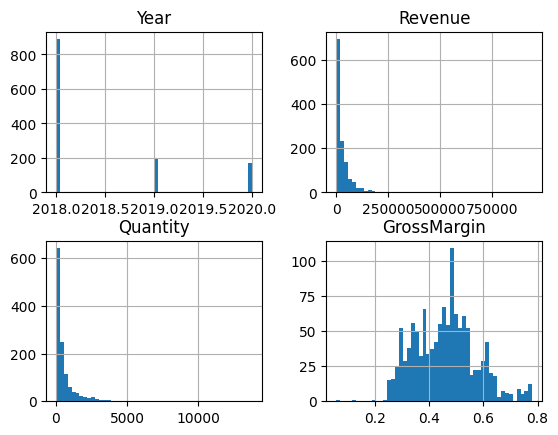

In [8]:
df_num.hist(bins=50)
plt.show()

Jika kita lihat dari hasil sebaran distribusi pada data Revenue & GrossMargin, kita bisa melihat bahwa distribusi data Revenue cenderung high-skewed, sedangkan GrossMargin adalah normal (gaussian). <br>

Hal ini bisa kita anggap bahwa untuk pengisian missing values untuk:
- Revenue : menggunakan Median (nilai tengah).
- GrossMargin : menggunakan Mean (nilai rata-rata).

Outliers analysis

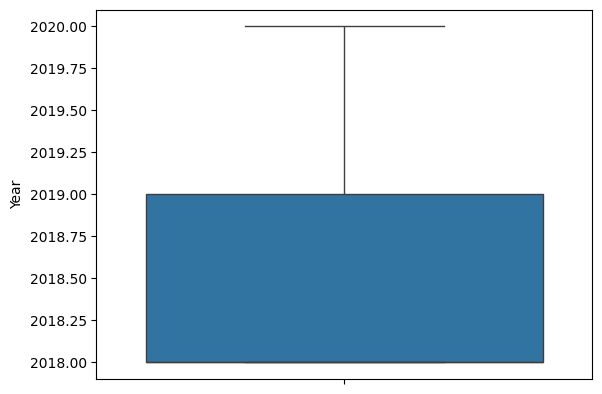

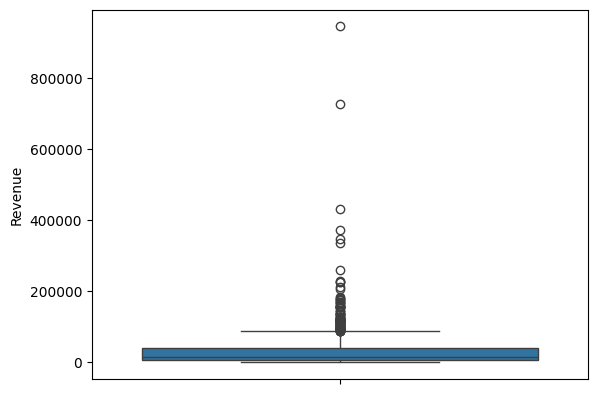

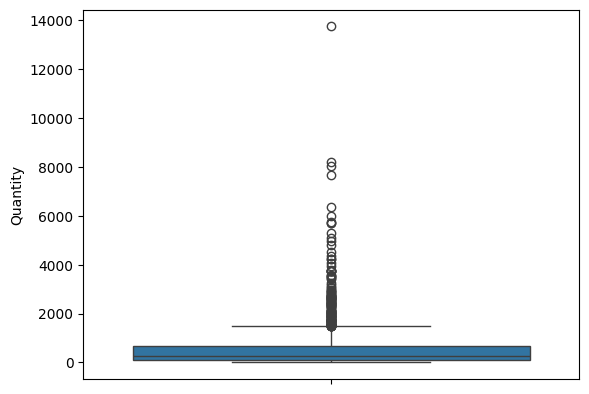

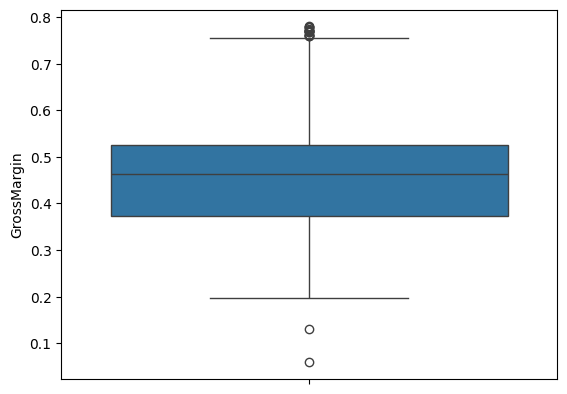

In [9]:
for col in df_num.columns:
    sns.boxplot(df_num[col])
    plt.show()

- Quantity: kita batasin sampai 7000.
- Revenue: kita batasin sampai 500_000.

In [10]:
df[df['Quantity'] > 7000]

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
24,SaleID_25,United States,Sales visit,Outdoors Shop,Camping Equipment,Climbing Accessories,Granite Carabiner,2018.0,Q1 2018,51961.68,13758.0,0.490122
791,SaleID_792,United States,Web,Department Store,Camping Equipment,Putters,Course Pro Putter,2018.0,Q4 2018,345712.31,7661.0,0.330526
814,SaleID_815,United States,Web,Warehouse Store,Camping Equipment,Tents,Star Peg,2018.0,Q4 2018,15980.12,8188.0,0.485098
1032,SaleID_1033,United States,Sales visit,Outdoors Shop,Sports Equipment,Climbing Accessories,Granite Carabiner,2019.0,Q4 2019,31555.20,8057.0,0.497867


In [11]:
# Capping outliers
df = df[df['Quantity'] < 7000]
df = df[df['Revenue'] < 500000]

In [12]:
len(df)

1240

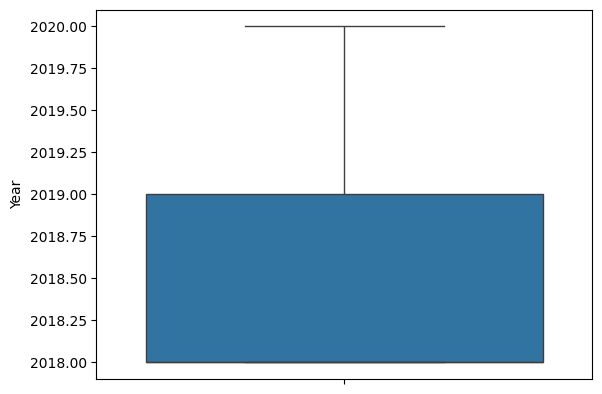

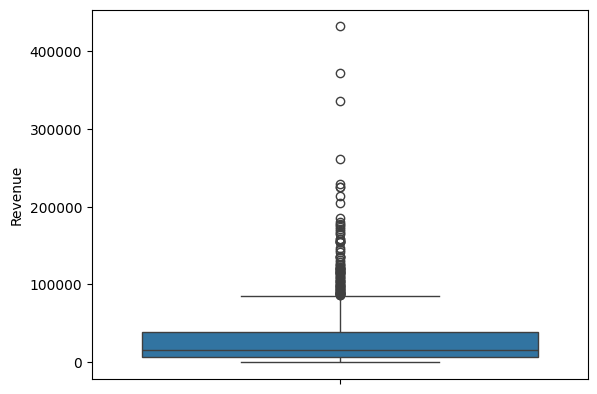

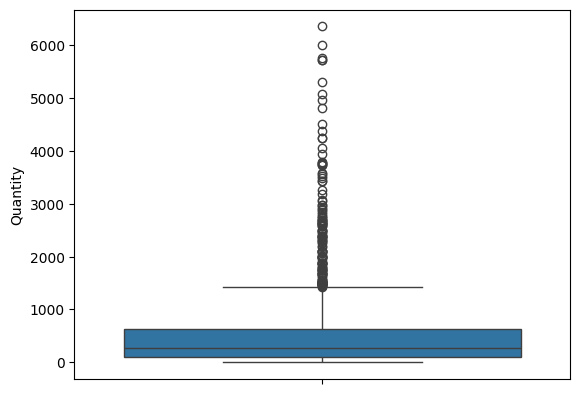

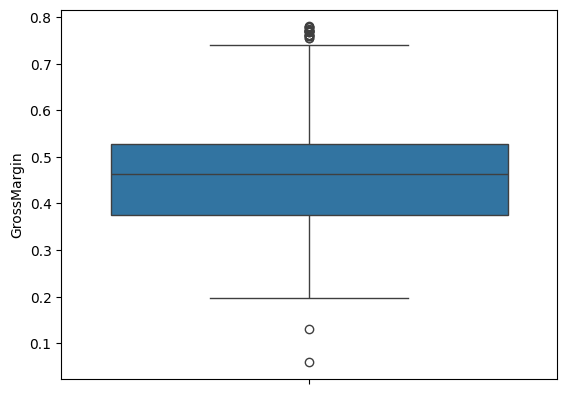

In [13]:
for col in df_num.columns:
    sns.boxplot(df[col]);
    plt.show()

In [14]:
df.head()

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,SaleID_1,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,SaleID_2,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
5,SaleID_6,United States,Fax,Outdoors Shop,Camping Equipment,First Aid,Aloe Relief,2018.0,Q1 2018,811.28,138.0,0.642887
6,SaleID_7,United States,Phone,Mall,Camping Equipment,Watches,Infinity,2018.0,Q1 2018,11100.00,52.0,0.484727
7,SaleID_8,United States,Phone,Mall,Camping Equipment,Watches,TX,2018.0,Q1 2018,14104.00,74.0,0.470985


Dropping unnecessary column:

In [15]:
df.drop('SaleID', axis=1, inplace=True)
df.columns

Index(['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine',
       'ProductType', 'Product', 'Year', 'Quarter', 'Revenue', 'Quantity',
       'GrossMargin'],
      dtype='object')

In [16]:
df.head()

,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
5,United States,Fax,Outdoors Shop,Camping Equipment,First Aid,Aloe Relief,2018.0,Q1 2018,811.28,138.0,0.642887
6,United States,Phone,Mall,Camping Equipment,Watches,Infinity,2018.0,Q1 2018,11100.00,52.0,0.484727
7,United States,Phone,Mall,Camping Equipment,Watches,TX,2018.0,Q1 2018,14104.00,74.0,0.470985


## Categorical Data Analysis

In [17]:
df_obj = df.select_dtypes(include=np.object_)
df_obj.columns

Index(['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine',
       'ProductType', 'Product', 'Quarter'],
      dtype='object')

In [18]:
df_obj.head()

,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Quarter
0,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,Q1 2018
1,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,Q1 2018
5,United States,Fax,Outdoors Shop,Camping Equipment,First Aid,Aloe Relief,Q1 2018
6,United States,Phone,Mall,Camping Equipment,Watches,Infinity,Q1 2018
7,United States,Phone,Mall,Camping Equipment,Watches,TX,Q1 2018


In [19]:
df.Quarter.unique()

array(['Q1 2018', 'Q2 2018', 'Q3 2018', 'Q4 2018', 'Q2 2019', 'Q3 2019',
       'Q4 2019', 'Q1 2020', 'Q2 2020', 'Q3 2020'], dtype=object)

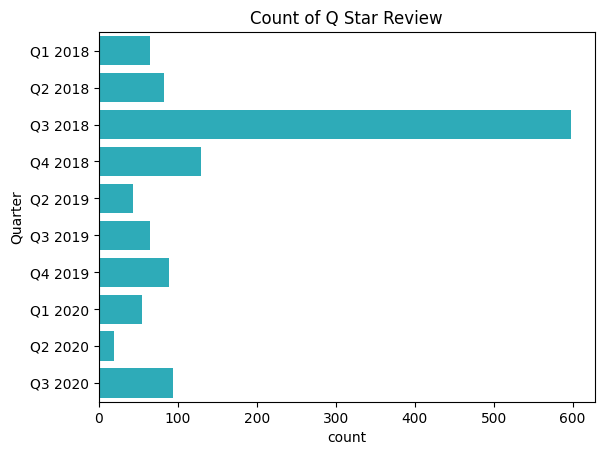

In [20]:
for col in df.Quarter.unique():
    sns.countplot(df.Quarter)

plt.title('Count of Q Star Review')
plt.show()

In [21]:
df['RetailerCountry'].value_counts()

RetailerCountry
United States     152
Germany           126
Japan             102
Singapore          88
Italy              75
Sweden             67
United Kingdom     64
Canada             64
France             63
Finland            52
Austria            48
Korea              44
Mexico             43
Netherlands        42
Switzerland        37
Spain              35
China              35
Denmark            32
Belgium            26
Australia          25
Brazil             20
Name: count, dtype: int64

Text(0.5, 1.0, 'Q Star Score Review (General)')

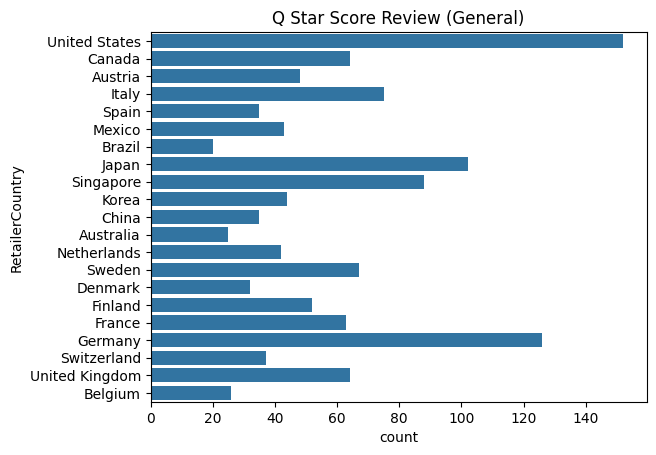

In [22]:
sns.countplot(data=df, y='RetailerCountry')
plt.title('Q Star Score Review (General)')

In [23]:
q1_2018 = df[df['Quarter'] == 'Q1 2018']
q1_2020 = df[df['Quarter'] == 'Q1 2020']

q2_2019 = df[df['Quarter'] == 'Q2 2019']
q2_2020 = df[df['Quarter'] == 'Q2 2020']

q3_2018 = df[df['Quarter'] == 'Q3 2018']
q3_2019 = df[df['Quarter'] == 'Q3 2019']
q3_2020 = df[df['Quarter'] == 'Q3 2020']

q4_2018 = df[df['Quarter'] == 'Q4 2018']
q4_2019 = df[df['Quarter'] == 'Q4 2019']

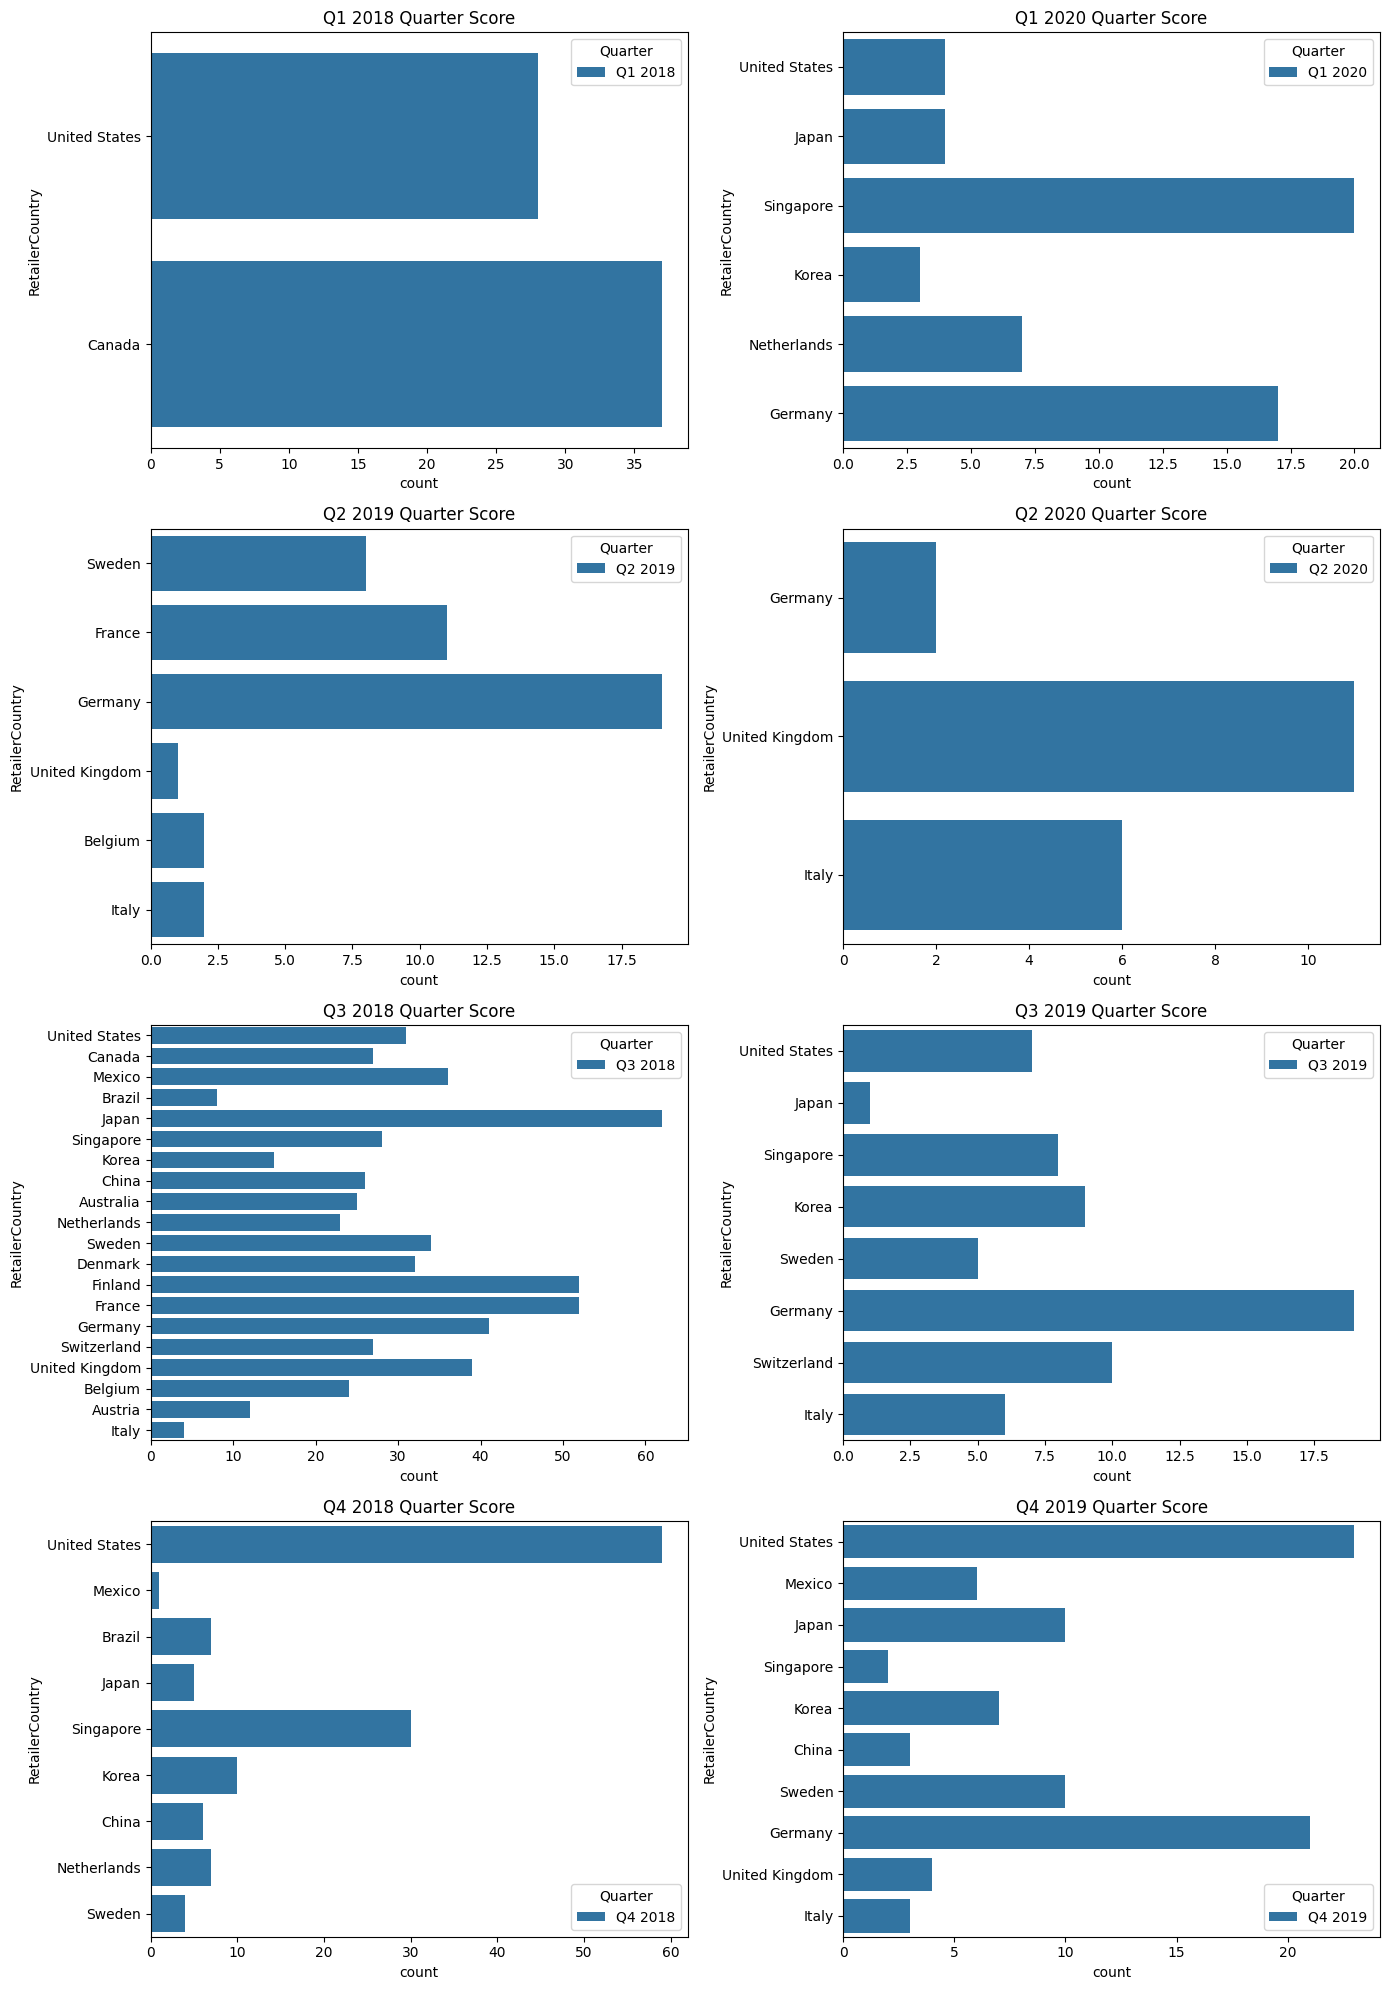

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))

# Q1 2018 dan Q1 2020
sns.countplot(data=q1_2018, y='RetailerCountry', hue='Quarter', ax=axes[0, 0])
axes[0, 0].set_title('Q1 2018 Quarter Score')

sns.countplot(data=q1_2020, y='RetailerCountry', hue='Quarter', ax=axes[0, 1])
axes[0, 1].set_title('Q1 2020 Quarter Score')

# Q2 2019 dan Q2 2020
sns.countplot(data=q2_2019, y='RetailerCountry', hue='Quarter', ax=axes[1, 0])
axes[1, 0].set_title('Q2 2019 Quarter Score')

sns.countplot(data=q2_2020, y='RetailerCountry', hue='Quarter', ax=axes[1, 1])
axes[1, 1].set_title('Q2 2020 Quarter Score')

# Q3 2018 dan Q3 2019
sns.countplot(data=q3_2018, y='RetailerCountry', hue='Quarter', ax=axes[2, 0])
axes[2, 0].set_title('Q3 2018 Quarter Score')

sns.countplot(data=q3_2019, y='RetailerCountry', hue='Quarter', ax=axes[2, 1])
axes[2, 1].set_title('Q3 2019 Quarter Score')

# Q4 2018 dan Q4 2019
sns.countplot(data=q4_2018, y='RetailerCountry', hue='Quarter', ax=axes[3, 0])
axes[3, 0].set_title('Q4 2018 Quarter Score')

sns.countplot(data=q4_2019, y='RetailerCountry', hue='Quarter', ax=axes[3, 1])
axes[3, 1].set_title('Q4 2019 Quarter Score')

plt.tight_layout()
plt.show()

Dapat dikonklusikan bahwa ternyata Score Q Star yang yang paling mendominasi United States lalu diikuti oleh Germany

In [25]:
order_method = df.OrderMethod.value_counts()
order_method

OrderMethod
Web            419
Sales visit    236
Phone          211
Fax            147
E-mail         109
Mail            66
Other           52
Name: count, dtype: int64

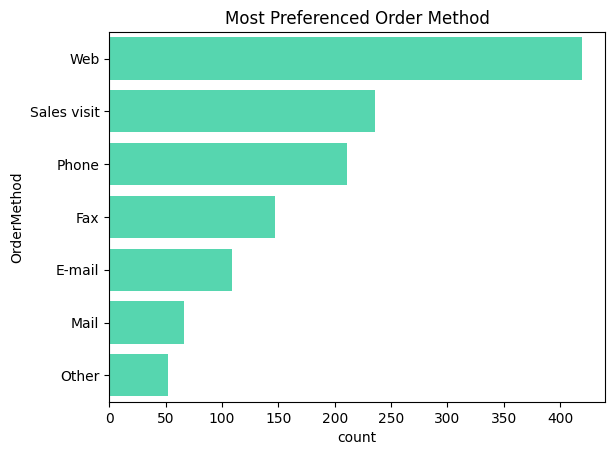

In [26]:
sns.barplot(order_method, orient='h', color='#41ebb7')
plt.title('Most Preferenced Order Method')
plt.show()

## Modelling (Machine Learning)

In [27]:
df.head()

,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
5,United States,Fax,Outdoors Shop,Camping Equipment,First Aid,Aloe Relief,2018.0,Q1 2018,811.28,138.0,0.642887
6,United States,Phone,Mall,Camping Equipment,Watches,Infinity,2018.0,Q1 2018,11100.00,52.0,0.484727
7,United States,Phone,Mall,Camping Equipment,Watches,TX,2018.0,Q1 2018,14104.00,74.0,0.470985


Disini kita anggap bahwa kita akan mau memprediksi keuntungan atau `Revenue` dari suatu data yang diberikan ini.

In [28]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((992, 10), (248, 10), (992,), (248,))

In [30]:
X_train.isna().sum()

RetailerCountry     0
OrderMethod         0
RetailerType        0
ProductLine         0
ProductType         0
Product             0
Year                0
Quarter             0
Quantity            0
GrossMargin        22
dtype: int64

In [31]:
X_test.isna().sum()

RetailerCountry    0
OrderMethod        0
RetailerType       0
ProductLine        0
ProductType        0
Product            0
Year               0
Quarter            0
Quantity           0
GrossMargin        1
dtype: int64

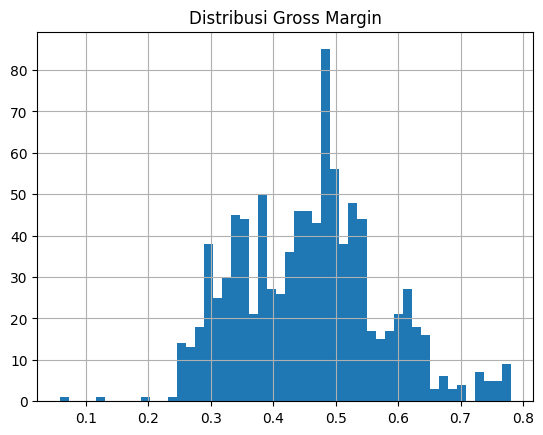

In [32]:
X_train['GrossMargin'].hist(bins=50)
plt.title('Distribusi Gross Margin')
plt.show()

Terlihat bahwa Gross Margin berdistribusi normal, maka kita akan melakukan imputasi missing value menggunakan mean.

In [33]:
X_train['GrossMargin'] = X_train['GrossMargin'].fillna(X_train['GrossMargin'].mean())
X_test['GrossMargin'] = X_test['GrossMargin'].fillna(X_test['GrossMargin'].mean())

In [34]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

Categorical Encoding

In [35]:
df_obj.columns

Index(['RetailerCountry', 'OrderMethod', 'RetailerType', 'ProductLine',
       'ProductType', 'Product', 'Quarter'],
      dtype='object')

In [36]:
for col in df_obj.columns:
    print(col)
    print(df[col].unique())
    print('-'*50)


RetailerCountry
['United States' 'Canada' 'Austria' 'Italy' 'Spain' 'Mexico' 'Brazil'
 'Japan' 'Singapore' 'Korea' 'China' 'Australia' 'Netherlands' 'Sweden'
 'Denmark' 'Finland' 'France' 'Germany' 'Switzerland' 'United Kingdom'
 'Belgium']
--------------------------------------------------
OrderMethod
['Fax' 'Phone' 'Mail' 'Web' 'Sales visit' 'Other' 'E-mail']
--------------------------------------------------
RetailerType
['Outdoors Shop' 'Mall' 'Department Store' 'Sports Store'
 'Warehouse Store' 'Discount Retailer' 'Online Retailer'
 'Direct Marketing']
--------------------------------------------------
ProductLine
['Personal Accessories' 'Sports Equipment' 'Camping Equipment'
 'Mountaineering Equipment' 'Outdoor Protection']
--------------------------------------------------
ProductType
['Cooking Gear' 'First Aid' 'Watches' 'Sunscreen' 'Irons' 'Eyewear'
 'Knives' 'Binoculars' 'Sleeping Bags' 'Rope' 'Safety' 'Tools'
 'Insect Repellents' 'Navigation' 'Woods' 'Putters' 'Golf Accessor

We're going to use `LabelEncoder` to convert our categorical data into numerical data.

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_obj.columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
cols_to_scaled = ['Year', 'Quantity', 'GrossMargin']

scaler = StandardScaler()
X_train[cols_to_scaled] = scaler.fit_transform(X_train[cols_to_scaled])
X_test[cols_to_scaled] = scaler.transform(X_test[cols_to_scaled])

In [39]:
X_train

,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Quantity,GrossMargin
986,9,4,7,1,16,122,0.785793,6,-0.406526,1.635341
1123,15,1,5,1,18,60,2.170351,1,1.048986,0.248149
519,7,6,3,2,3,21,-0.598766,5,-0.119018,-1.333239
510,6,5,1,0,4,13,-0.598766,5,-0.600594,0.715107
1233,1,6,6,4,10,114,2.170351,7,-0.638929,-0.903832
...,...,...,...,...,...,...,...,...,...,...
787,20,6,3,1,19,91,-0.598766,8,-0.248396,0.124494
863,15,1,5,3,19,98,-0.598766,8,-0.649710,1.158972
1251,16,6,6,3,0,109,2.170351,7,-0.079485,-1.534864
582,8,4,0,3,7,86,-0.598766,5,-0.574239,-0.127239


In [40]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = model.predict(X_test)
y_pred[:10]

array([  5830.6092,  13363.4208,   2661.1036,  21514.1913, 151785.4129,
        50963.3277,  23684.9998,  25295.5506,  16268.1646,  13708.1487])

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
print(f'Accuracy Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Accuracy Score: 0.6904161174623904
Mean Squared Error: 538500150.2945559
Mean Absolute Error: 11006.906945564515


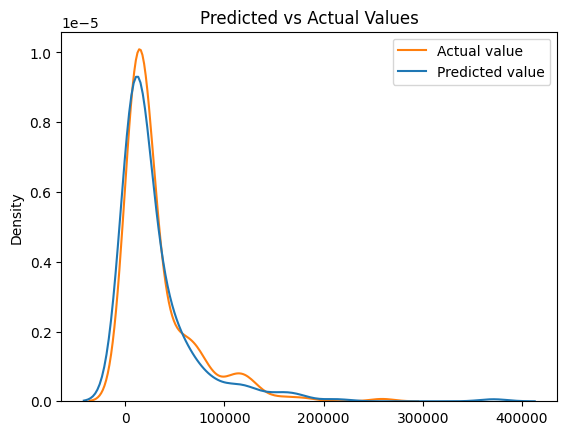

In [44]:
arr = [y_test, y_pred]
sns.kdeplot(arr)
plt.title('Predicted vs Actual Values')
plt.legend(['Actual value', 'Predicted value'])
plt.show()